# Handle Outliers


In [3]:
import pandas as pd
import seaborn as sns

In [5]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\anukatiy\AppData\Local\Temp\ipykernel_32528\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

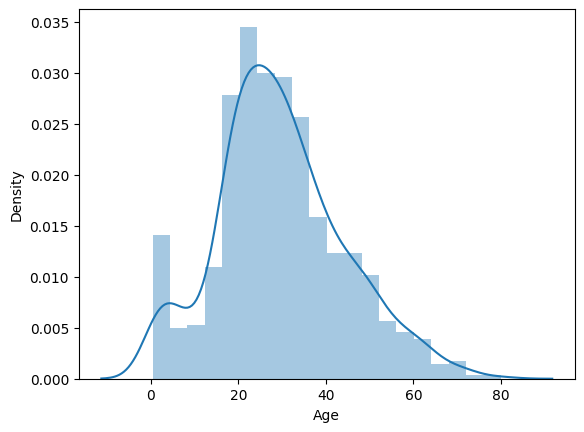

In [6]:
sns.distplot(data['Age'])

C:\Users\anukatiy\AppData\Local\Temp\ipykernel_32528\3740318898.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'].fillna(90))


<Axes: xlabel='Age', ylabel='Density'>

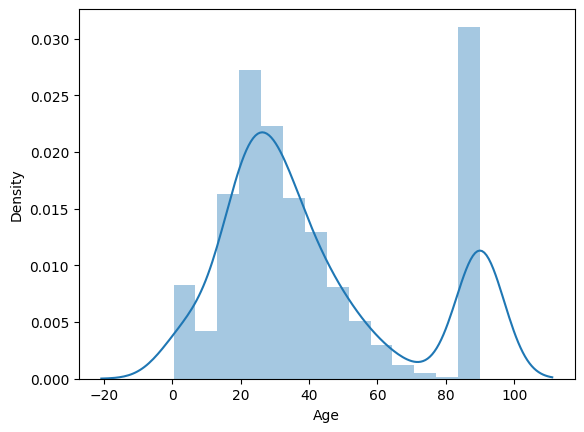

In [7]:
sns.distplot(data['Age'].fillna(90))

#Observation:there are significant missing values in the dataset. These are distorting data distribution

Text(0, 0.5, 'No of passenger')

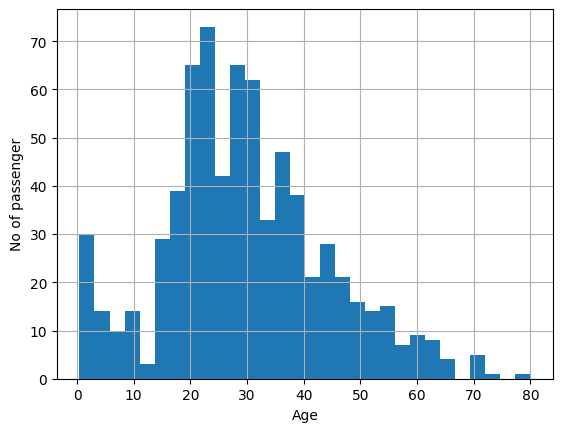

In [13]:
figure = data['Age'].hist(bins=30)
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

<Axes: >

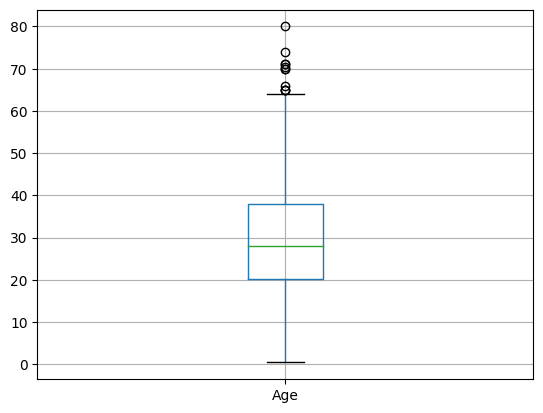

In [17]:
data.boxplot(column="Age")

In [18]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
# Calculate boundaries to seperate outliers from dataset assuming data is normally distributed

upp_boundary = data['Age'].mean() + 3* data['Age'].std()
lower_boundary = data['Age'].mean() - 3* data['Age'].std()

print(lower_boundary, "to", upp_boundary)

-13.880374349943303 to 73.27860964406094


In [23]:
# Calculate IQR for age
IQR = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
IQR

17.875

In [33]:
age_lower_bridge =data['Age'].quantile(0.25) - 1.5 * IQR
age_upper_bridge = data['Age'].quantile(0.25) + 1.5 * IQR

print(age_lower_bridge, "to", age_upper_bridge)

-14.5094 to 54.7594


<Axes: >

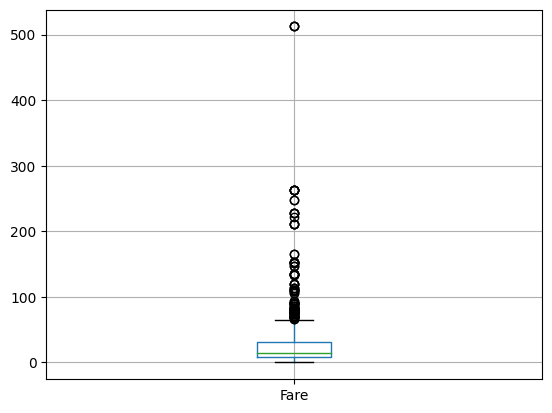

In [26]:
data.boxplot('Fare')

<Axes: >

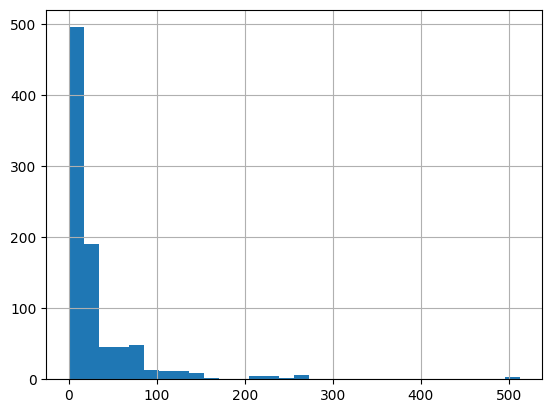

In [27]:
data['Fare'].hist(bins=30)

In [28]:
# Calculate IQR for age
IQR = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)

23.0896

In [34]:
# idenitfy extreme range as data is skewed
fare_lower_bridge =data['Fare'].quantile(0.25) - 3 * IQR
fare_upper_bridge = data['Fare'].quantile(0.25) + 3 * IQR

print("Fare:", fare_lower_bridge, "to", fare_upper_bridge)

Fare: -61.358399999999996 to 77.1792


In [36]:
data1 = data.copy()

In [38]:
#Handle Outliers for Age and Fare

data1.loc[data['Age']>age_upper_bridge, 'Age'] = age_upper_bridge
data1.loc[data['Fare']>fare_upper_bridge, 'Fare'] = fare_upper_bridge

In [39]:
data1.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0000,1,0,237736,30.0708,NaN,C


<Axes: >

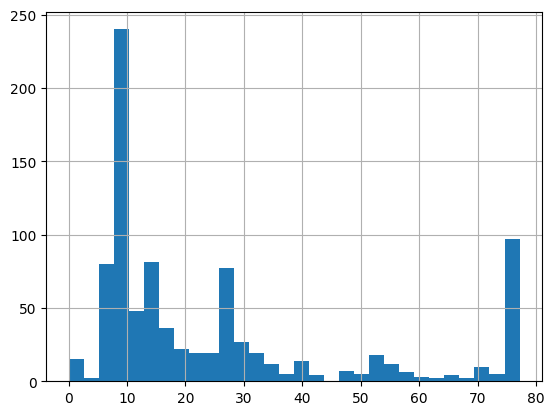

In [41]:
data1.Fare.hist(bins=30)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data1[['Age','Fare']].fillna(0),data1['Survived'],test_size=0.3)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

print("Accuracy Score:" , accuracy_score(y_test, y_pred))
print("ROC AUC Score:" , roc_auc_score(y_test, y_pred_prob[:,1]))

Accuracy Score: 0.6716417910447762
ROC AUC Score: 0.6988314344142564


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)

print("Accuracy Score:" , accuracy_score(y_test, y_pred))
print("ROC AUC Score:" , roc_auc_score(y_test, y_pred_prob[:,1]))